# Homework set 1

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 6, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0


Pablo Alves - 15310191
Nitai Nijholt - 12709018

## Importing packages
Execute the following statement to import the packages `numpy` and `math` and the plotting package Matplotlib.

In [46]:
import numpy as np
import math
import matplotlib.pyplot as plt

The `math` package contains functions such as $\tan$, $\exp$ and the factorial $n \mapsto n!$

In [47]:
# example: the factorial function
math.factorial(5)

120

If you want to access `math.factorial` without typing `math.` each time you use it, use `import from`. Same for `math.exp`

In [48]:
from math import factorial, exp, tan

factorial(5)

120

## Very short introduction to Matplotlib

`matplotlib` is a useful package for visualizing data using Python. Run the first cell below to plot $\sqrt{x}, x, x^2, x^3$ for $x \in [1, 10]$.

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


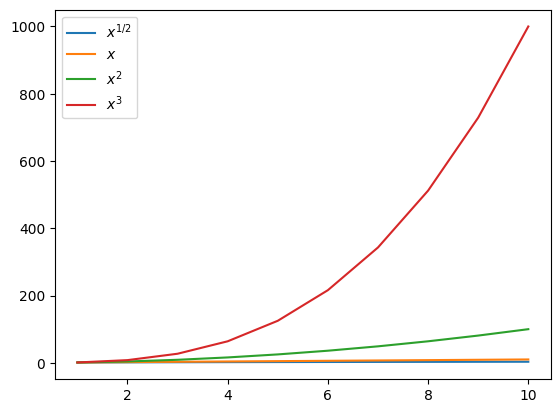

In [49]:
x = np.linspace(1, 10, 10)  # 10 points evenly between 1 and 10.
print(x)
plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

When visualizing functions where $y$ has many different orders of magnitude, a logarithmic scale is useful:

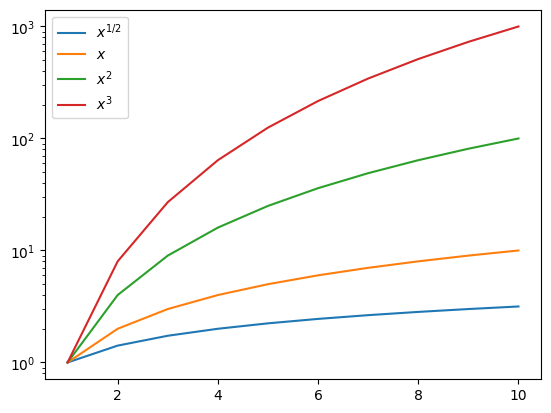

In [50]:
x = np.linspace(1, 10, 10)
plt.semilogy(x, x**0.5, label=r"$x^{1/2}$")
plt.semilogy(x, x**1, label=r"$x$")
plt.semilogy(x, x**2, label=r"$x^2$")
plt.semilogy(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

When also the $x$-axis contains many orders of magnitude, a log-log plot is most useful:

[1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10]


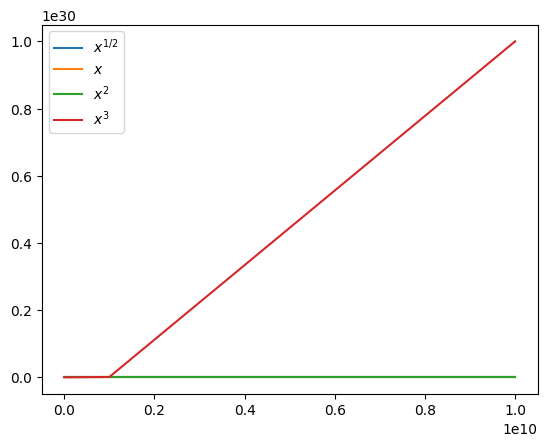

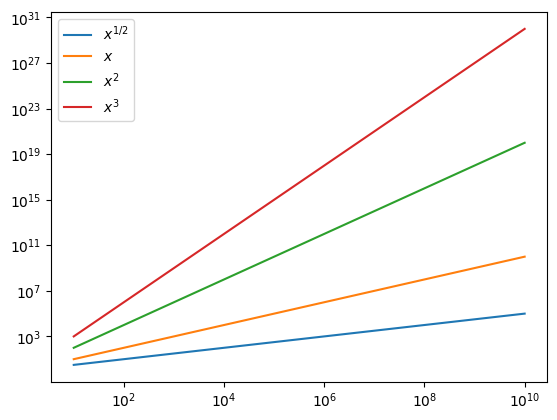

In [51]:
x = np.logspace(1, 10, 10, base=10)  # 10 points evenly between 10^1 and 10^10.
print(x)

plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

plt.loglog(x, x**0.5, label=r"$x^{1/2}$")
plt.loglog(x, x**1, label=r"$x$")
plt.loglog(x, x**2, label=r"$x^2$")
plt.loglog(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

## Python float types
Information about the Python `float` type is in `sys.float_info`.

In [52]:
import sys

# printing float_info displays information about the python float type
print(sys.float_info)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


In [53]:
# the individual properties can be accessed as follows
print("epsilon for the python float type: ", sys.float_info.epsilon)

epsilon for the python float type:  2.220446049250313e-16


-----
# Exercise 1

## (a)
Write a program to compute an approximate value for the derivative of a function using the finite difference formula 
$$f'(x) \approx \frac{f(x+h) - f(x)}{h} .$$
Test your program using the function $\tan(x)$ for $x=1$. Determine the error by comparing with the analytical derivative of $\tan(x)$. Plot the magnitude of the error as a function of $h$, for $h = 10^{-k}$, $k=0,1,2, \ldots, 16$ using an appropriate type of plot. Is there a minimum value for the magnitude of the error? How does the corresponding value for $h$ compare with the rule of thumb $h \approx \sqrt{\epsilon_{\rm mach}}$ derived in Heath example 1.3?

In [9]:
# your code here

def AproxDerivative(func, x, h):
    """Approximate the derivative of func at x using a step size of h."""
    return (func(x+h) - func(x))/h


In [10]:
def DerivOfTan(x):
    """Compute the derivative of tan(x) at x."""
    return 1/np.cos(x)**2


In [11]:
# vector of step sizes
list_of_h = [10**-k for k in range(1, 16)]

In [12]:
DerivOfTan(1) 

3.425518820814759

In [13]:
# setting up data for plotting
x = 1


analytical_result = DerivOfTan(x)
aproximation_a = [AproxDerivative(tan, x, h) for h in list_of_h]
error_a = aproximation_a - analytical_result

In [14]:
analytical_result

3.425518820814759

In [15]:
aproximation_a

[4.0735193259375,
 3.4798299564668067,
 3.430863217312341,
 3.4260524082818655,
 3.4255721710785276,
 3.4255241554426163,
 3.425519354838258,
 3.4255188463561126,
 3.4255189795828755,
 3.425517647315246,
 3.4255043246389505,
 3.425704164783383,
 3.4217073618947325,
 3.419486915845482,
 3.774758283725532]

In [16]:
error_a

array([ 6.48000505e-01,  5.43111357e-02,  5.34439650e-03,  5.33587467e-04,
        5.33502638e-05,  5.33462786e-06,  5.34023499e-07,  2.55413535e-08,
        1.58768116e-07, -1.17349951e-06, -1.44961758e-05,  1.85343969e-04,
       -3.81145892e-03, -6.03190497e-03,  3.49239463e-01])

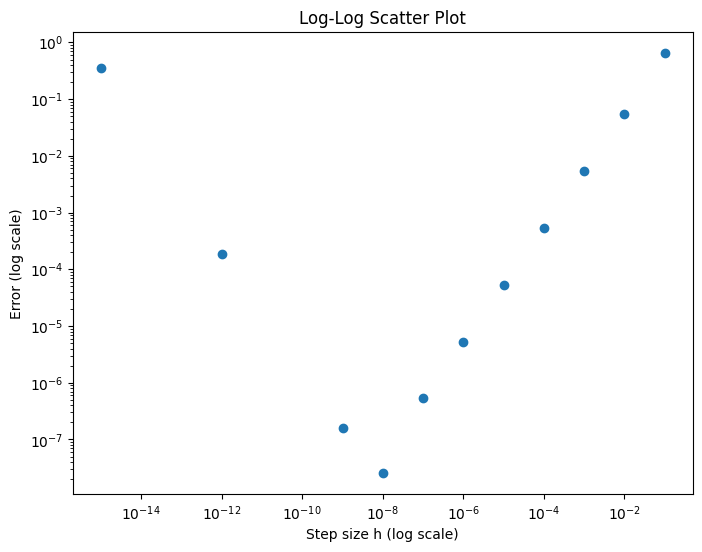

In [18]:
# plotting the results
# plt.loglog(list_of_h, ground_truth, label="ground truth")

plt.figure(figsize=(8,6))
plt.scatter(list_of_h, error_a) # Change error to error_a
plt.yscale('log')
plt.xscale('log')
plt.title('Log-Log Scatter Plot')
plt.xlabel('Step size h (log scale)')
plt.ylabel('Error (log scale)')
plt.show()

In [19]:
# calculate machine precision
epsilon = 1.0
while (1.0 + 0.5 * epsilon) != 1.0:
    epsilon = 0.5 * epsilon

machine_precision = epsilon
print("Machine precision calculated by script:", machine_precision)
print("Epsilon for the python float type from float_info: ", sys.float_info.epsilon)

Machine precision calculated by script: 2.220446049250313e-16
Epsilon for the python float type from float_info:  2.220446049250313e-16


In [20]:
error_a

array([ 6.48000505e-01,  5.43111357e-02,  5.34439650e-03,  5.33587467e-04,
        5.33502638e-05,  5.33462786e-06,  5.34023499e-07,  2.55413535e-08,
        1.58768116e-07, -1.17349951e-06, -1.44961758e-05,  1.85343969e-04,
       -3.81145892e-03, -6.03190497e-03,  3.49239463e-01])

In [21]:
min_error = np.min(error_a)
min_error

-0.006031904969276969

In [22]:
index_of_min_error = np.argmin(error_a)
index_of_min_error

13

In [23]:
min_error

-0.006031904969276969

In [24]:
index_of_min_error

13

In [25]:
# finding minimum of the error:
min_error = np.min(error_a)
index_of_min_error = np.argmin(error_a)  # Use np.argmin to get the index
h_corresponding_to_min_error = list_of_h[index_of_min_error]
heuristic_h = np.sqrt(machine_precision)

print("Minimum error: ", min_error)
print("Index of minimum error: ", index_of_min_error)
print("Step size corresponding to minimum error: ", h_corresponding_to_min_error)
print("Best step size according to Heath heuristic: ", heuristic_h)

Minimum error:  -0.006031904969276969
Index of minimum error:  13
Step size corresponding to minimum error:  1e-14
Best step size according to Heath heuristic:  1.4901161193847656e-08


Write your answer, using $\LaTeX$, in this box.


Write a program to compute an approximate value for the derivative of a function using the finite difference formula 
$$f'(x) \approx \frac{f(x+h) - f(x)}{h} .$$
Test your program using the function $\tan(x)$ for $x=1$. Determine the error by comparing with the analytical derivative of $\tan(x)$. Plot the magnitude of the error as a function of $h$, for $h = 10^{-k}$, $k=0,1,2, \ldots, 16$ using an appropriate type of plot. Is there a minimum value for the magnitude of the error? How does the corresponding value for $h$ compare with the rule of thumb $h \approx \sqrt{\epsilon_{\rm mach}}$ derived in Heath example 1.3?


## (b)
Repeat the exercise using the centered difference approximation
$$ f'(x) \approx \frac{f(x+h) - f(x-h)}{2h} .$$

In [26]:
# your code here

def AproxDerivativeCenteredDiff(func, x, h):
    """Approximate the derivative of func at x using a step size of h."""
    return (func(x+h) - func(x))/h


In [27]:
# setting up data for plotting
x = 1


analytical_result = DerivOfTan(x)
aproximation_b = [AproxDerivativeCenteredDiff(tan, x, h) for h in list_of_h]
error_b = aproximation_b - analytical_result

In [28]:
analytical_result

3.425518820814759

In [29]:
aproximation_b

[4.0735193259375,
 3.4798299564668067,
 3.430863217312341,
 3.4260524082818655,
 3.4255721710785276,
 3.4255241554426163,
 3.425519354838258,
 3.4255188463561126,
 3.4255189795828755,
 3.425517647315246,
 3.4255043246389505,
 3.425704164783383,
 3.4217073618947325,
 3.419486915845482,
 3.774758283725532]

In [30]:
error_b

array([ 6.48000505e-01,  5.43111357e-02,  5.34439650e-03,  5.33587467e-04,
        5.33502638e-05,  5.33462786e-06,  5.34023499e-07,  2.55413535e-08,
        1.58768116e-07, -1.17349951e-06, -1.44961758e-05,  1.85343969e-04,
       -3.81145892e-03, -6.03190497e-03,  3.49239463e-01])

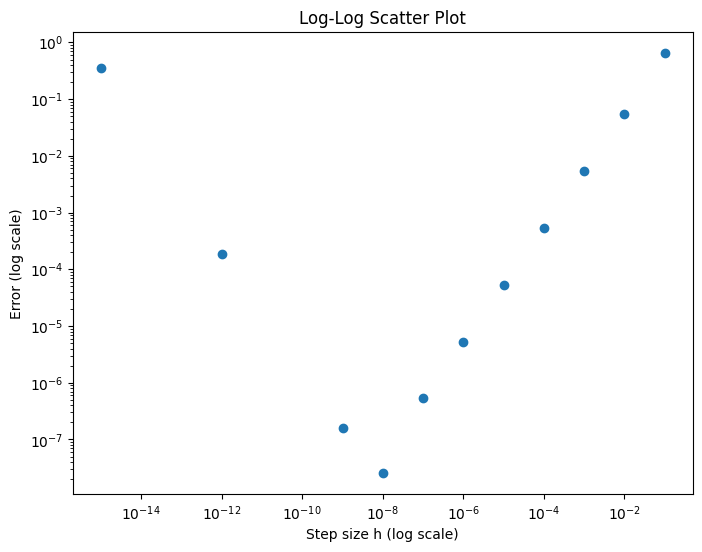

In [31]:
# plotting the results
# plt.loglog(list_of_h, ground_truth, label="ground truth")

plt.figure(figsize=(8,6))
plt.scatter(list_of_h, error_b)
plt.yscale('log')
plt.xscale('log')
plt.title('Log-Log Scatter Plot')
plt.xlabel('Step size h (log scale)')
plt.ylabel('Error (log scale)')
plt.show()

In [35]:
# calculate machine precision
epsilon = 1.0
while (1.0 + 0.5 * epsilon) != 1.0:
    epsilon = 0.5 * epsilon

machine_precision = epsilon
print("Machine precision calculated by script:", machine_precision)
print("Epsilon for the python float type from float_info: ", sys.float_info.epsilon)

Machine precision calculated by script: 2.220446049250313e-16
Epsilon for the python float type from float_info:  2.220446049250313e-16


In [37]:
error_b # Change error to error_b

array([ 6.48000505e-01,  5.43111357e-02,  5.34439650e-03,  5.33587467e-04,
        5.33502638e-05,  5.33462786e-06,  5.34023499e-07,  2.55413535e-08,
        1.58768116e-07, -1.17349951e-06, -1.44961758e-05,  1.85343969e-04,
       -3.81145892e-03, -6.03190497e-03,  3.49239463e-01])

In [38]:
min_error = np.min(error_b)
min_error

-0.006031904969276969

In [39]:
index_of_min_error = np.argmin(error_b)
index_of_min_error

13

In [40]:
min_error

-0.006031904969276969

In [41]:
index_of_min_error

13

In [42]:
# finding minimum of the error:
min_error = np.min(error_b)
index_of_min_error = np.argmin(error_b)  # Use np.argmin to get the index
h_corresponding_to_min_error = list_of_h[index_of_min_error]
heuristic_h = np.sqrt(machine_precision)

print("Minimum error: ", min_error)
print("Index of minimum error: ", index_of_min_error)
print("Step size corresponding to minimum error: ", h_corresponding_to_min_error)
print("Best step size according to Heath heuristic: ", heuristic_h)

Minimum error:  -0.006031904969276969
Index of minimum error:  13
Step size corresponding to minimum error:  1e-14
Best step size according to Heath heuristic:  1.4901161193847656e-08


Write your answer, using $\LaTeX$, in this box.

-----
# Exercise 2
As you probably know, the exponential function $e^x$ is given by an infinite series
$$ \tag{*} e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \ldots . $$

## (a)
Suppose you write a program to sum the series in the natural order, what stopping criterion should you use? Explain your answer.

**Answer** 
If we rewrite our function in this form
$$ \tag{1} e^x=\sum_{n=0}^{\infty}\frac{x^n}{n!} $$

We can notice that every term in this infinite sum that we want to compute will thus have a numerator $x^n$ and denominator $n!$.
Because we are dealing with infinite positive large values for $n \in \mathbb{N}$ and arbitrary large or small values for $x \in \mathbb{R}$, both the numerator and the denominator, we are expected to have arbitrary large or small values at some point during the summation. Since we are dealing with limit memory for our computations, and we are computing the sum itteratively, we can use the following stopping criterion for every iteration:

For the numerator, it will suffice to store the previous numerator $x^(n-1)$ and check if the current iteration will make the variable overflow the maximun value that can be represented with our number variable. If the current numerator overflows, then we stop at this iteration. For the denominator, a similar process is followed: we store the previous denominator $(n-1)!$ and check if multiplying it by the new n value will overflow the number variable. If this happens, we will also stop

## (b)
Write a program to sum the series in the natural order, using the stopping criterion you just described.

Test your program for $$x = \pm 1, \pm 5, \pm 10, \pm 15, \pm 20 , $$ and compare your results with the built-in function $\exp(x)$. Explain any cases where the exponential function is not well approximated.

x [-20, -15, -10, -5, -1, 1, 5, 10, 15, 20]
exp(x) [2.061153622438558e-09, 3.059023205018258e-07, 4.5399929762484854e-05, 0.006737946999085467, 0.36787944117144233, 2.718281828459045, 148.4131591025766, 22026.465794806718, 3269017.3724721107, 485165195.4097903]
exp_hat_2(x) [1, 1, 1, 1, 1, 2.7182818284590455, 148.41315910257657, 22026.46579480671, 3269017.3724721107, 485165195.40979016]


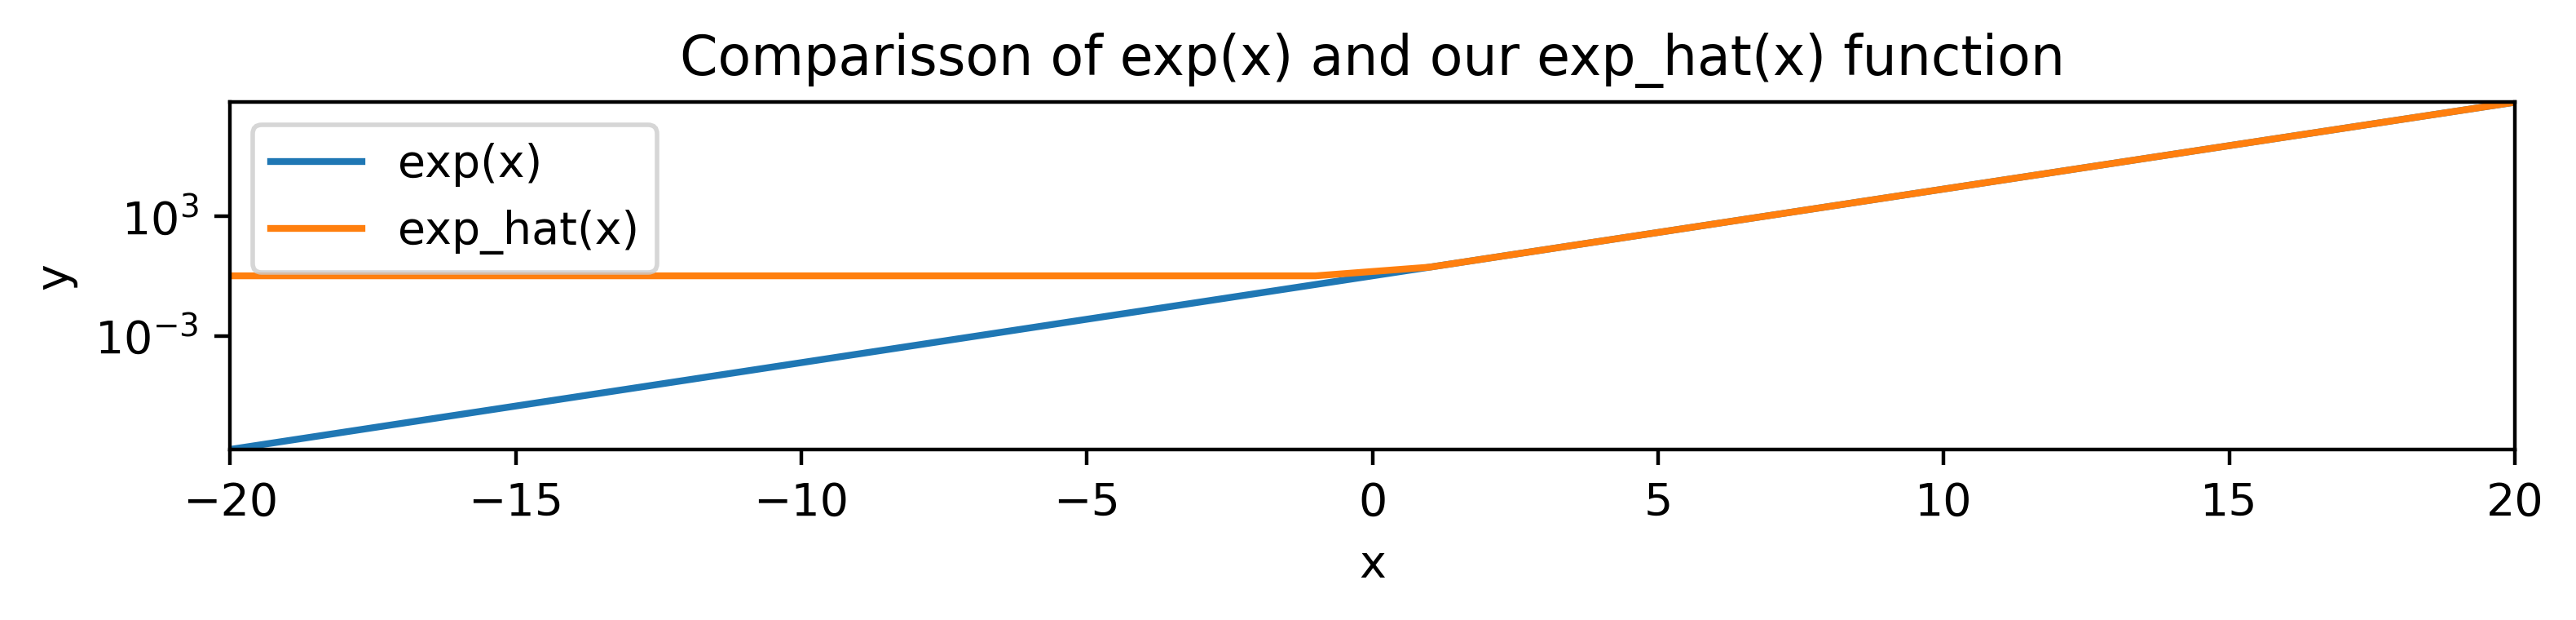

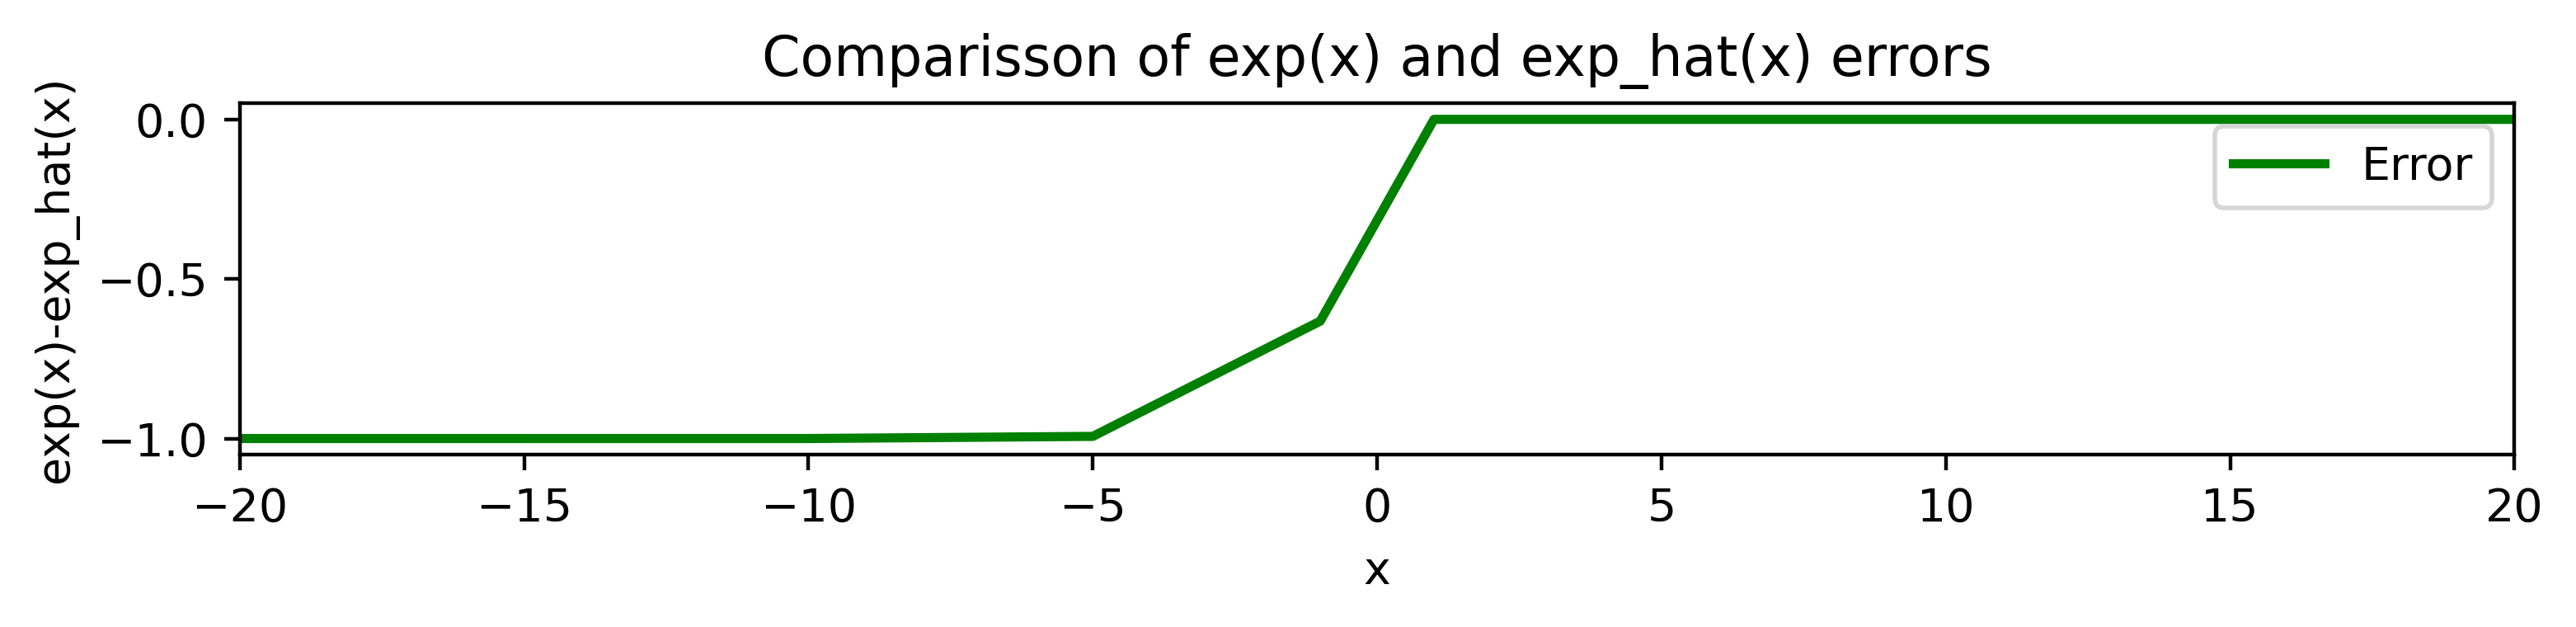

In [142]:
def exp_hat(x):
    # Start variables
    e_x = 1
    numerator = 1
    denominator = 1
    maximun_float = sys.float_info.max
    minimun_float = sys.float_info.min
    n = 1

    # Check trivial output
    if x==0: return 1
    
    # Loop the infinite sum
    while True:
        ## Compute the next term in the series
        numerator   *= x
        denominator *= n
        
        ## Check if numerator and denominator are in range
        if (minimun_float < numerator < maximun_float) and (minimun_float < denominator < maximun_float):
            ### If so, add the next sum term
            e_x += (numerator / denominator)
            ### And update the sum index
            n   += 1
            
        ## Otherwise, break
        else: break
            
    return e_x


# Testing
test_values = [-20,-15,-10,-5,-1,1,5,10,15,20]
e_s         = []
e_hats      = []
errors       = []

for x in test_values:
    e,e_hat = exp(x),exp_hat(x)
    error = e - e_hat
    
    e_s.append(e)
    e_hats.append(e_hat)
    errors.append(error)

# Print the values
print('x',test_values)
print('exp(x)',e_s)
print('exp_hat_2(x)',e_hats)

# Plot the functions
plt.figure(figsize=(8,2),dpi=400)
plt.title('Comparisson of exp(x) and our exp_hat(x) function')
plt.semilogy(test_values,e_s,label='exp(x)')
plt.semilogy(test_values,e_hats,label='exp_hat(x)')
plt.xlim([-20,20])
plt.xlabel ('x')
plt.ylabel ('y')
plt.ylim([e_s[0],e_s[len(test_values)-1]])
plt.legend()
plt.tight_layout()
plt.show()

# Plot the errors
plt.figure(figsize=(8,2),dpi=400)
plt.title('Comparisson of exp(x) and exp_hat(x) errors')
plt.plot(test_values,errors,label='Error',lw=2,c='green')
plt.xlim([-20,20])
plt.xlabel ('x')
plt.ylabel ('exp(x)-exp_hat(x)')
#plt.ylim([errors[0],errors[len(test_values)-1]])
plt.legend()
plt.tight_layout()
plt.show()

**Answer**
Overall, this approximation is good, but its not working for negative x values, for which our output will always be 0

## (c)

Can you use the series in this form to obtain accurate results for $x<0$? (*Hint*: $e^{-x} = 1/e^x$.) If yes, write a second program that implements this and test it again on $x=-1, -5, -10, -15, -20$. 

Write your answer, using $\LaTeX$, in this box.

x [-20, -15, -10, -5, -1]
exp(x)-exp_hat_2(x) [-4.1359030627651384e-25, 0.0, -6.776263578034403e-21, -1.734723475976807e-18, 5.551115123125783e-17]


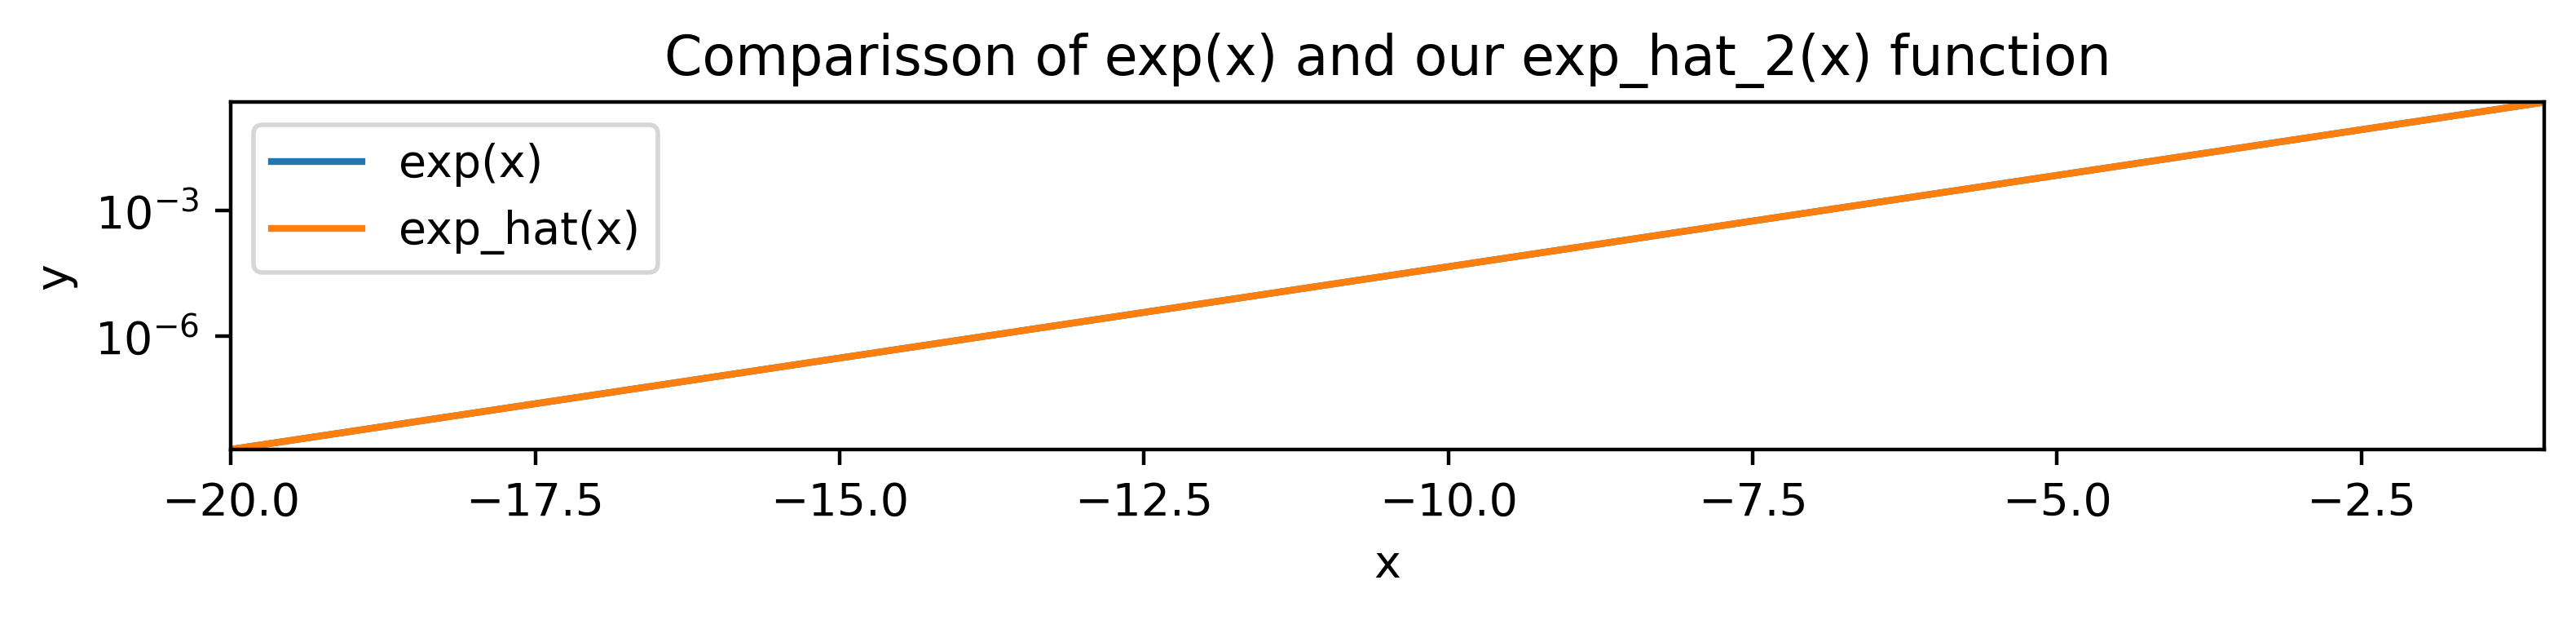

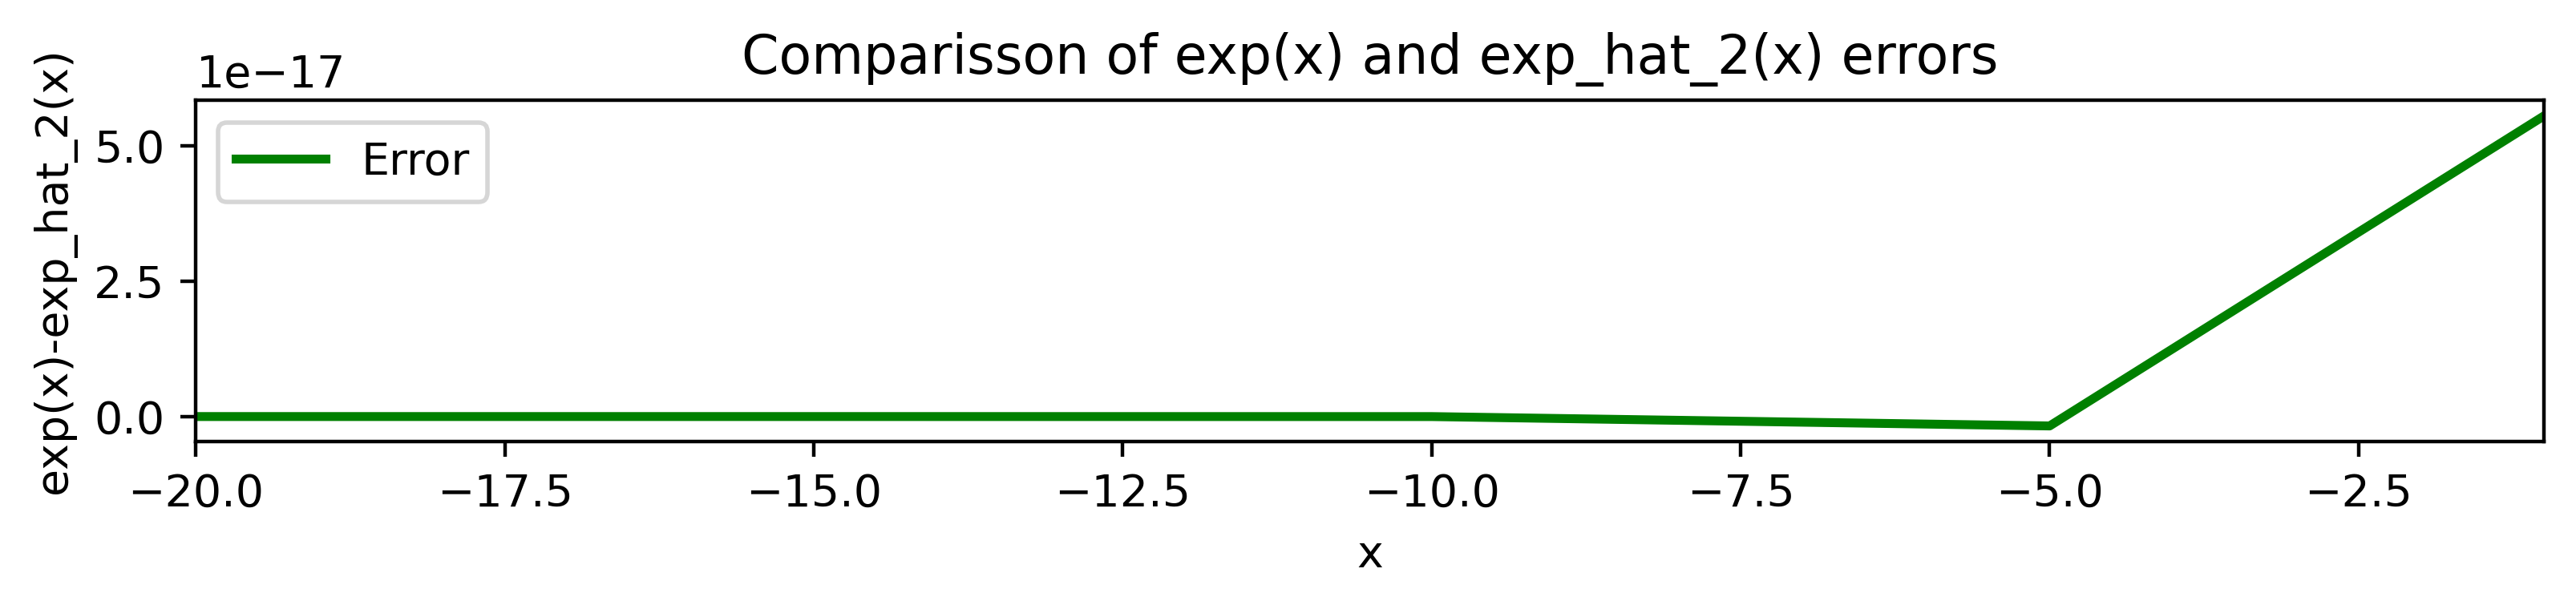

In [148]:
# Update the function to deal with negative x values
def exp_hat_2(x):
    # Compute the output assuming positive x
    e_x = exp_hat(abs(x))
    
    if x >= 0:
        ## For positive x, return the value
        return e_x
    else:
        ## For negative x, use the property
        e_x = 1 / e_x

        ## Compare e_x to the minimun value
        minimun_float = sys.float_info.min
         
        if e_x < minimun_float:
            ## If e_x is smaller than the minimun, return 0
            return 0
        else:
            ## Otherwise return our value
            return e_x

# Testing
test_values = [-20,-15,-10,-5,-1]
e_s         = []
e_hats      = []
errors       = []

for x in test_values:
    e,e_hat = exp(x),exp_hat_2(x)
    error = e - e_hat
    
    e_s.append(e)
    e_hats.append(e_hat)
    errors.append(error)

# Print the values
print('x',test_values)
#print('exp(x)',e_s)
#print('exp_hat_2(x)',e_hats)
print('exp(x)-exp_hat_2(x)',errors)

# Plot the functions
plt.figure(figsize=(8,2),dpi=400)
plt.title('Comparisson of exp(x) and our exp_hat_2(x) function')
plt.semilogy(test_values,e_s,label='exp(x)')
plt.semilogy(test_values,e_hats,label='exp_hat(x)')
plt.xlim([-20,-1])
plt.xlabel ('x')
plt.ylabel ('y')
plt.ylim([e_s[0],e_s[len(test_values)-1]])
plt.legend()
plt.tight_layout()
plt.show()

# Plot the errors
plt.figure(figsize=(8,2),dpi=400)
plt.title('Comparisson of exp(x) and exp_hat_2(x) errors')
plt.plot(test_values,errors,label='Error',lw=2,c='green')
plt.xlim([-20,-1])
plt.xlabel ('x')
plt.ylabel ('exp(x)-exp_hat_2(x)')
plt.legend()
plt.tight_layout()
plt.show()

## (d)

Can you rearrange the series of regroup the terms of the series (\*) in any way to obtain more acccurate results for $x < 0$?

**Answer**
No. Our biggest error is 5.551115123125783e-17 at most, which is very small. This happens for x values close to 0. For x values with a higher absolute value our error is basically neglectible.